In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('../../data/10_genres_audio_features.tsv', delimiter='\t')
df.shape

(9999, 15)

In [4]:
df.head(10)

,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
0,3lOMJTQTd6J34faYwASc33,0.795,0.859,2,-2.994,1,0.0542,0.0361,0.000000,0.0321,0.356,96.986,168107,4,pop
1,0So2sgVa8aJiARPl2P29u2,0.725,0.446,4,-8.958,0,0.0287,0.8500,0.243000,0.1070,0.311,90.024,187333,4,pop
2,5sbooPcNgIE22DwO0VNGUJ,0.566,0.769,7,-4.342,1,0.0872,0.0183,0.000000,0.1080,0.385,170.036,191100,4,pop
3,5rZlwNFl01HqLWBQGryKSm,0.480,0.602,10,-6.335,0,0.3680,0.4870,0.000000,0.0848,0.269,179.798,213333,4,pop
4,0PvFJmanyNQMseIFrU708S,0.823,0.586,6,-6.606,0,0.2000,0.1140,0.000000,0.1930,0.347,125.971,190476,4,pop
5,1mcgxXkPeUN9wXwEex3poW,0.625,0.488,2,-8.624,0,0.0461,0.1180,0.000028,0.1150,0.381,159.991,160500,4,pop
6,6EDO9iiTtwNv6waLwa1UUq,0.800,0.560,5,-4.818,0,0.2610,0.0570,0.000000,0.1340,0.450,163.071,200221,4,pop
7,1tkg4EHVoqnhR6iFEXb60y,0.709,0.548,10,-8.493,1,0.3530,0.6500,0.000002,0.1330,0.543,83.995,160000,4,pop
8,79s5XnCN4TJKTVMSmOx8Ep,0.548,0.805,7,-5.732,1,0.3510,0.2120,0.000389,0.4080,0.648,142.094,216387,4,pop
9,5C9JlYhuv96JQXyXuxYsB2,0.392,0.579,7,-9.195,1,0.1640,0.8350,0.001790,0.1450,0.549,80.961,214707,4,pop


In [5]:
raw_data = df.drop(['id'], axis=1)
raw_data.head(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
0,0.795,0.859,2,-2.994,1,0.0542,0.0361,0.000000,0.0321,0.356,96.986,168107,4,pop
1,0.725,0.446,4,-8.958,0,0.0287,0.8500,0.243000,0.1070,0.311,90.024,187333,4,pop
2,0.566,0.769,7,-4.342,1,0.0872,0.0183,0.000000,0.1080,0.385,170.036,191100,4,pop
3,0.480,0.602,10,-6.335,0,0.3680,0.4870,0.000000,0.0848,0.269,179.798,213333,4,pop
4,0.823,0.586,6,-6.606,0,0.2000,0.1140,0.000000,0.1930,0.347,125.971,190476,4,pop
5,0.625,0.488,2,-8.624,0,0.0461,0.1180,0.000028,0.1150,0.381,159.991,160500,4,pop
6,0.800,0.560,5,-4.818,0,0.2610,0.0570,0.000000,0.1340,0.450,163.071,200221,4,pop
7,0.709,0.548,10,-8.493,1,0.3530,0.6500,0.000002,0.1330,0.543,83.995,160000,4,pop
8,0.548,0.805,7,-5.732,1,0.3510,0.2120,0.000389,0.4080,0.648,142.094,216387,4,pop
9,0.392,0.579,7,-9.195,1,0.1640,0.8350,0.001790,0.1450,0.549,80.961,214707,4,pop


In [17]:
data = raw_data.drop_duplicates().reset_index(drop=True)
data['instrumentalness'] = data['instrumentalness'].mul(100).round(3)
data['duration_ms'] = data['duration_ms'].div(60000).round(3)
data.columns = data.columns.str.replace('duration_ms', 'duration_min')
data

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min,time_signature,genre
0,0.795,0.859,2,-2.994,1,0.0542,0.036100,0.000,0.0321,0.3560,96.986,2.802,4,pop
1,0.725,0.446,4,-8.958,0,0.0287,0.850000,24.300,0.1070,0.3110,90.024,3.122,4,pop
2,0.566,0.769,7,-4.342,1,0.0872,0.018300,0.000,0.1080,0.3850,170.036,3.185,4,pop
3,0.480,0.602,10,-6.335,0,0.3680,0.487000,0.000,0.0848,0.2690,179.798,3.556,4,pop
4,0.823,0.586,6,-6.606,0,0.2000,0.114000,0.000,0.1930,0.3470,125.971,3.175,4,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8811,0.574,0.983,0,-3.612,0,0.0818,0.001050,0.191,0.2900,0.7840,140.011,2.972,4,edm
8812,0.524,0.862,7,-5.135,1,0.0378,0.114000,20.300,0.1010,0.6880,106.954,2.601,4,edm
8813,0.557,0.661,1,-4.824,0,0.0858,0.094700,0.000,0.1420,0.6080,62.597,3.310,4,edm
8814,0.678,0.992,5,-7.128,1,0.0528,0.000425,88.000,0.1290,0.0695,125.013,0.850,4,edm


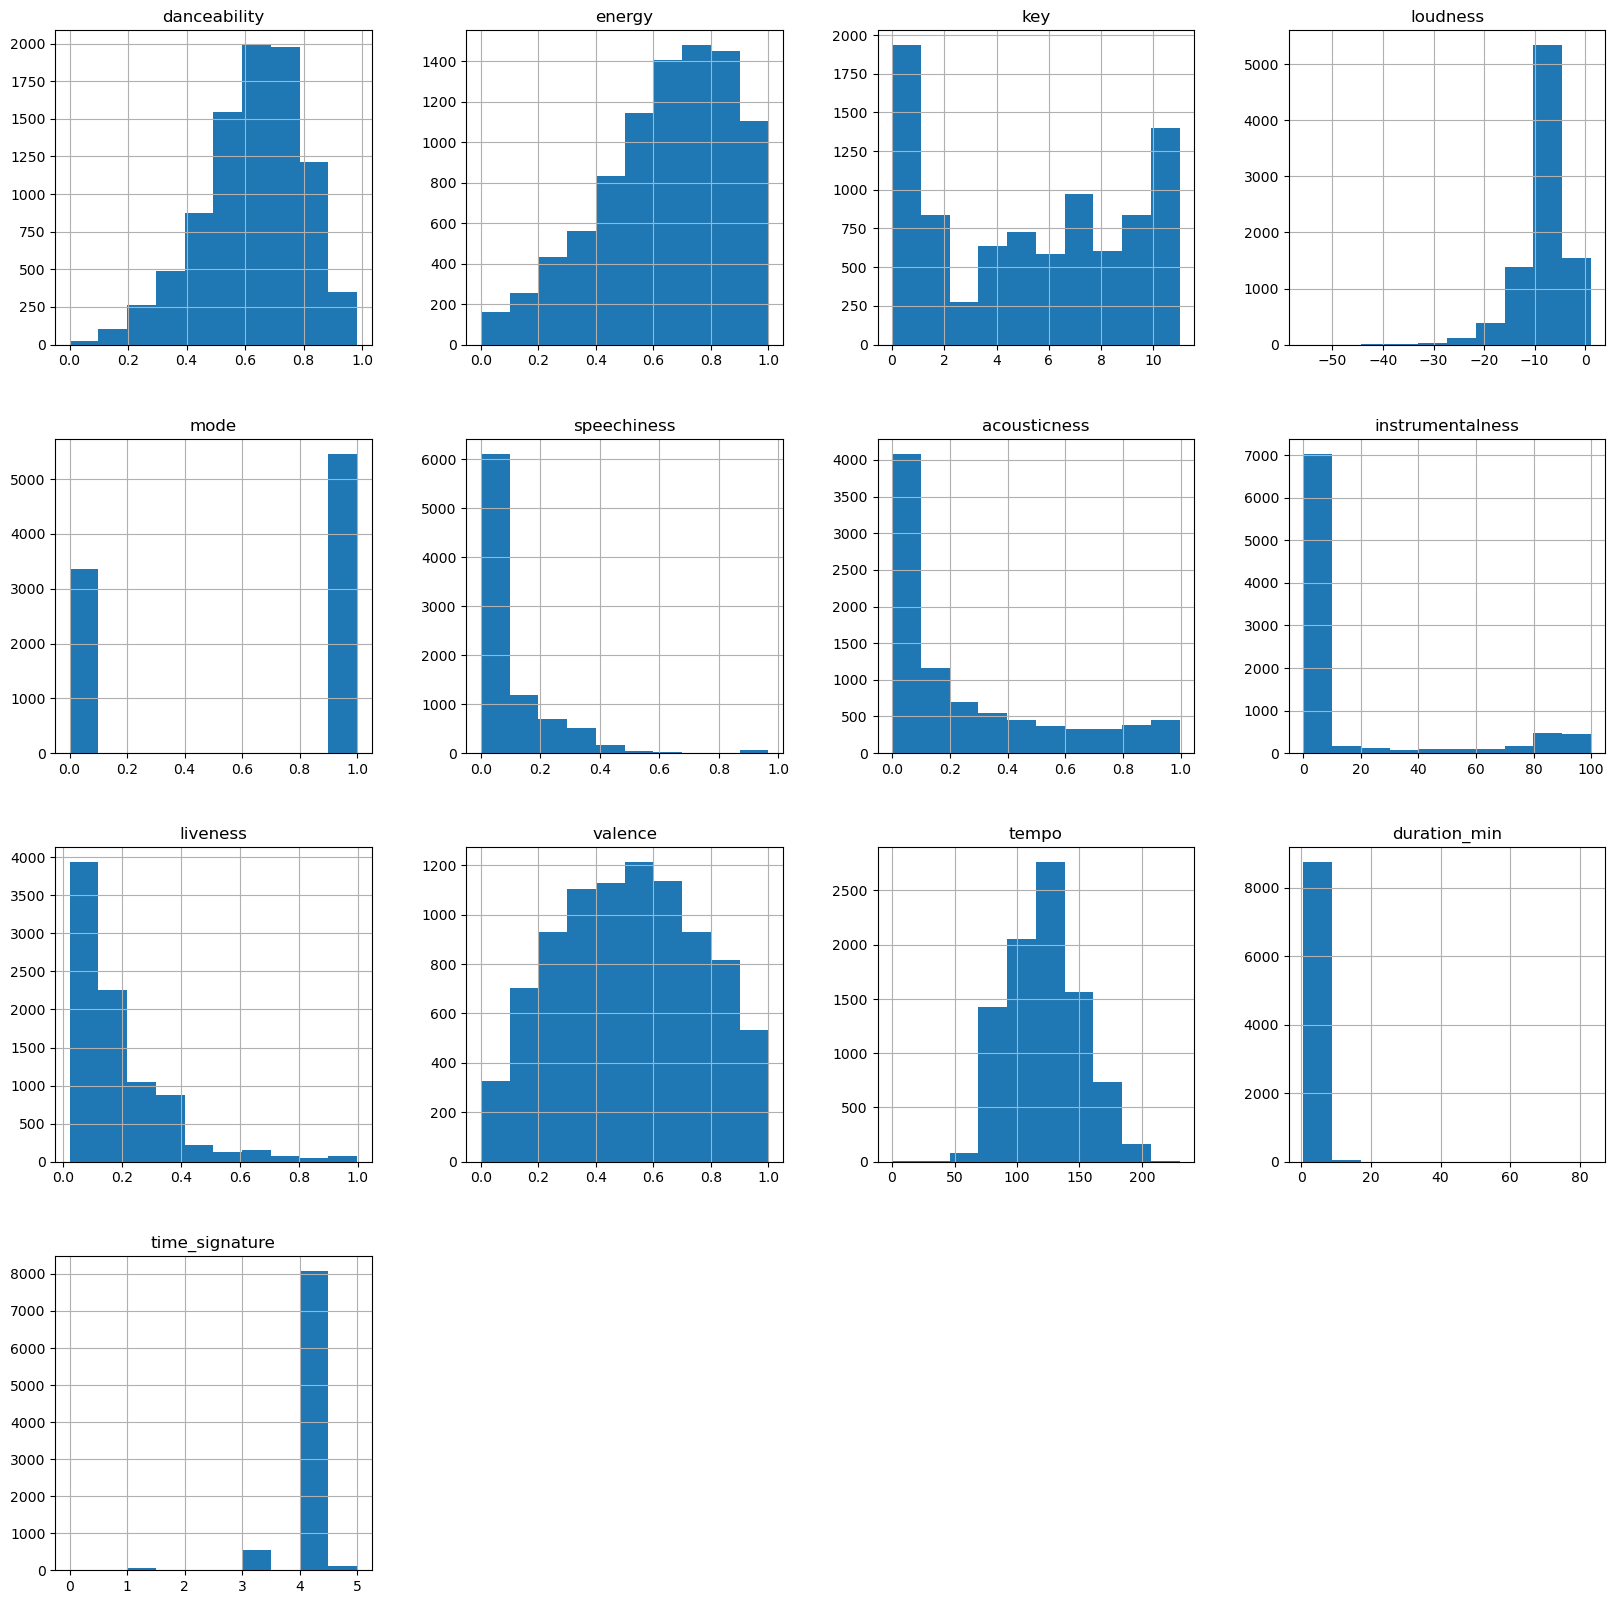

In [23]:
data.hist(layout=(4, 4), figsize=(20, 20))
plt.show()

In [19]:
label = data['genre']
label.value_counts()

indie      976
k-pop      967
metal      966
hip hop    963
edm        946
house      943
country    829
rap        802
rock       739
pop        685
Name: genre, dtype: int64

In [ ]:
encoder = LabelEncoder()
y = encoder.fit_transform(label)
len(y)

8816

In [ ]:
scaler = StandardScaler()
x = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))
x.shape

(8816, 13)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=20)
x_train.shape

(7052, 13)

-------

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

import plotly.express as px

In [ ]:
knn_model = KNeighborsClassifier()
dec_model = DecisionTreeClassifier()
mlp_model = MLPClassifier()
svm_model = SVC()
bagging_model = BaggingClassifier()
lgs_model = LogisticRegression()

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(knn_model, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
n_scores.mean()

0.28101018624555485

In [ ]:
lgs_model.fit(x_train, y_train)
knn_model.fit(x_train, y_train)
dec_model.fit(x_train, y_train)
mlp_model.fit(x_train, y_train)
svm_model.fit(x_train, y_train)
bagging_model.fit(x_train, y_train)

/home/sukivn/anaconda3/envs/min_ds-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


BaggingClassifier()

In [ ]:
lgs_acc = lgs_model.score(x_test, y_test)
knn_acc = knn_model.score(x_test, y_test)
dec_acc = dec_model.score(x_test, y_test)
mlp_acc = mlp_model.score(x_test, y_test)
svm_acc = svm_model.score(x_test, y_test)
bagging_acc = bagging_model.score(x_test, y_test)

print("Logistic Regression Accuracy", lgs_acc)
print("K-Nearest-Neighbors Accuracy:", knn_acc)
print("Decision Tree Accuracy:", dec_acc)
print("Neural Network Accuracy:", mlp_acc)
print("Bagging Algorithms Accuracy:", bagging_acc)
print("Support Vector Machine Accuracy:", svm_acc)

Logistic Regression Accuracy 0.3299319727891156
K-Nearest-Neighbors Accuracy: 0.28741496598639454
Decision Tree Accuracy: 0.2619047619047619
Neural Network Accuracy: 0.37188208616780044
Bagging Algorithms Accuracy: 0.3599773242630385
Support Vector Machine Accuracy: 0.3764172335600907


In [ ]:
accuracy_score(y_test, knn_model.predict(x_test))

0.23587223587223588

In [ ]:
f1_score(y_test, knn_model.predict(x_test), average='weighted')

0.1929095426239358

In [ ]:
fig = px.bar(
    x=["Logistic Regression", "K-Nearest-Neighbors", "Decision Tree", "Neural Network", "Bagging Algorithms", "Support Vector Machine"],
    y=[lgs_acc, knn_acc, dec_acc, mlp_acc, bagging_acc, svm_acc],
    color=["Logistic Regression", "K-Nearest-Neighbors", "Decision Tree", "Neural Network", "Bagging Algorithms", "Support Vector Machine"],
    labels={'x': "Model", 'y': "Accuracy"},
    title="Model Accuracy Comparison"
)

fig.show()